<a href="https://colab.research.google.com/github/ifrahsaleem/Airbnb2019/blob/master/IfrahSaleem_RamaHakmi_CS210_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ID: 50


By: Ifrah Saleem 26238/ Rama Hakmi 26271

In this project, 4 external datasets are being used:


1.   Airports in USA
2.   Subway Entrances and Exit in NYC
3.   Historical Sites in NYC
4.   Parks and Events in NYC 

This project is divided into 3 parts:

1.   Correlation of Airbnb Price with Other Factors 

    We assume that features like nearest distance from subway entrance, nearest distance from airport, nearest distance from parks/events, number of historical sites within 30km radius and room    type will show strong correlation with price.
    
2.   Hypothesis Testing 
3.   Applying Machine Learning model to find Airbnb Recommendations 





#Part 1: Correlation of Airbnb Price with Other Factors

In this section, we explore all our datasets, plot the distributions and try to visualize any correlation of price with other features in the dataset

In [0]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np 
from os.path import join
import matplotlib.pyplot as plt
import seaborn as sns
!pip install geopy
!pip install geopandas
import geopandas as gpd
from scipy import stats
from scipy.spatial.distance import cdist
from scipy.spatial import KDTree
from scipy.spatial import cKDTree
from geopy.distance import geodesic
import timeit
import folium
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 931kB 2.6MB/s 
     |████████████████████████████████| 10.4MB 36.5MB/s 
     |████████████████████████████████| 14.7MB 306kB/s 


In [0]:
data_path = "/content/gdrive/My Drive"
filename = "AB_NYC_2019.csv"

df = pd.read_csv(join(data_path, filename), delimiter=",")

##Understanding The Airbnb Data 

In [0]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
df.shape

(48895, 16)

In [0]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [0]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##Manipulating The Airbnb Data 

In [0]:
df.isnull().sum() / df.shape[0]

id                                0.000000
name                              0.000327
host_id                           0.000000
host_name                         0.000429
neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
last_review                       0.205583
reviews_per_month                 0.205583
calculated_host_listings_count    0.000000
availability_365                  0.000000
dtype: float64

In [0]:
df = df.drop(columns = "name")

In [0]:
df = df.drop(columns = "host_name" )
df = df.drop(columns = "last_review" )
df = df.drop(columns = "reviews_per_month" )

##Boroughs of New York 

####Analyzing The Distribution of Airbnbs in Each Borough

This plot helps us visualize the spread of airbnb within each borough. It can be seen that the Staten Island is least populated with Airbnbs while Brooklyn and Manhattan seem the most populated.

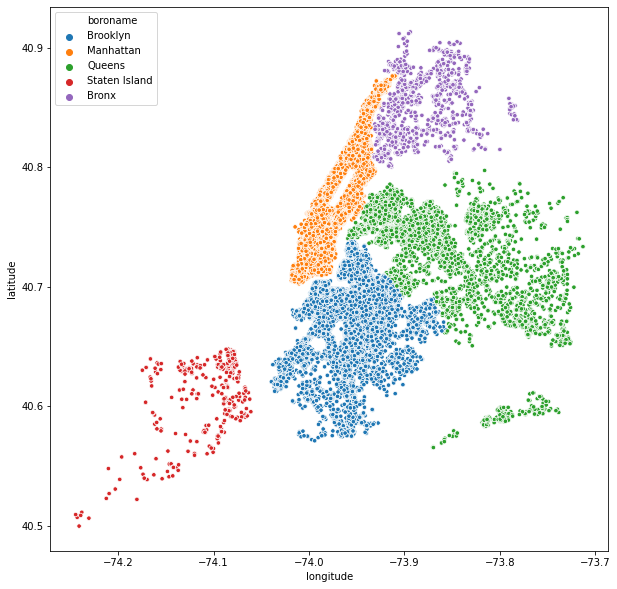

In [0]:
#Rename a column to accurately reflect Boroughs
df.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)
#Review the listings by boroname
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='boroname',s=20, data=df)

####Displaying Airbnb Count in Each Borough

This is a numerical representation of the spread and number of Airbnbs in each Borough. It displays that Manhattan and Brooklyn have the highest number of Airbnbs while Staten Island has the least. 

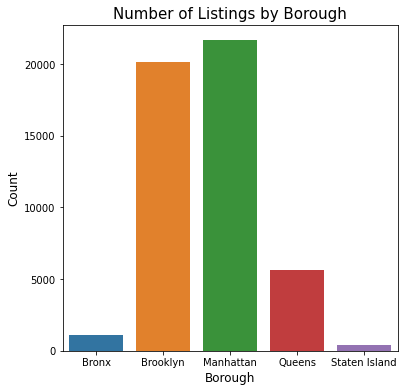

In [0]:
#Get a count by borough
borough_count = df.groupby('boroname').agg('count').reset_index()
#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='boroname', y='id', data=borough_count, ax=ax1)

ax1.set_title('Number of Listings by Borough', fontsize=15)
ax1.set_xlabel('Borough', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)


####Analyzing Room Type in Each Borough

This scatterplot helps to visualize the type of room available in each Borough. The result shows that each type of room is available in each Borough.

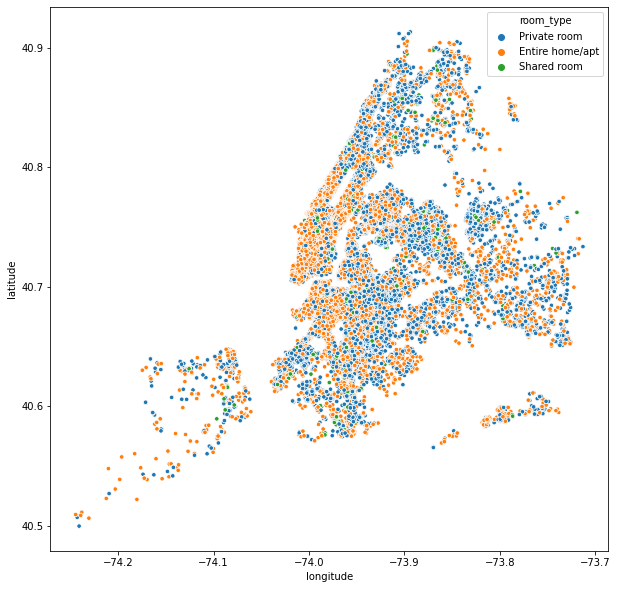

In [0]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='room_type',s=20, data=df)

##Airbnb Prices

####Displaying Price Distribution


The price distrbution seems to be highly left - skewed. 

Text(0, 0.5, 'Distribution')

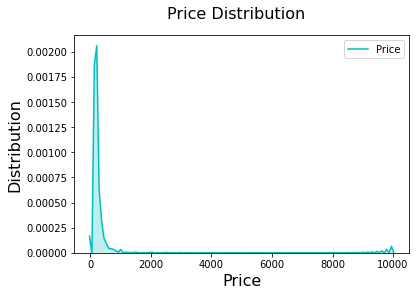

In [0]:
x = df["price"]
fig = sns.kdeplot(x, shade=True, label="Price", color="c")
fig.figure.suptitle("Price Distribution", fontsize = 16)
plt.xlabel('Price', fontsize=16)
plt.ylabel('Distribution', fontsize=16)

####Removing Outliers

The price distribution depicts some price value exist at the far right end. This means that the data consists of outliers which must be removed. Any Airbnb with price greater than three standard deviations is removed. 

In [0]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = df['price'].mean () + df['price'].std () * factor
lower_lim = df['price'].mean () - df['price'].std () * factor

df = df[(df['price'] < upper_lim) & (df['price'] > lower_lim)]

####Log - transforming Price 

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better. With help of log transformation, now, price feature have normal distribution.
The good fit indicates that normality is a reasonable approximation.

Text(0.5, 1.0, 'Log-Price Distribution Plot')

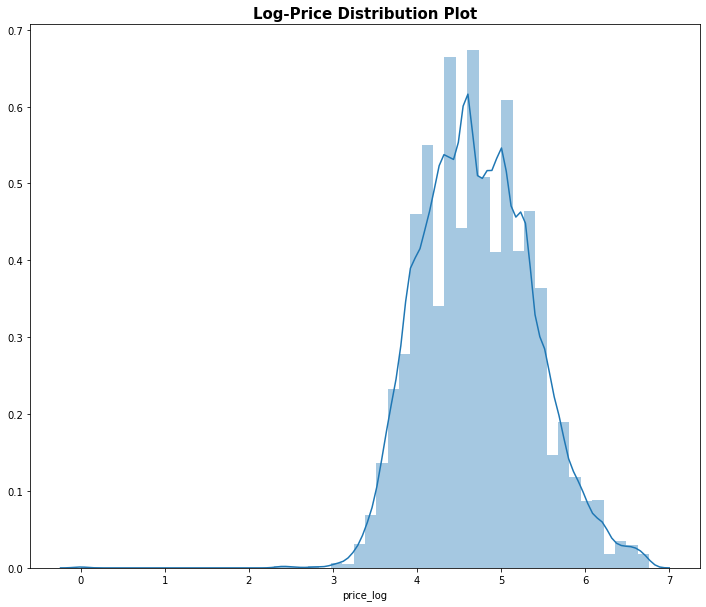

In [0]:
df['price_log'] = np.log(df.price+1)
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

####Total Number of Airbnb in each Price Category

Airbnb Prices have been divided into 4 categories (e.i. transformed into categorical data):


1.   Low
2.   Moderate
3.   High
4.   Very High 



In [0]:
def price_categorize(p):
  if p >= 0 and p <= 100:
    return "Low"

  elif p >= 101 and p <= 200:
    return "Moderate"

  elif p >= 201 and p <= 300:
    return "High"

  else:
    return "Very High"

df["price category"] = df["price"].apply(price_categorize)

Thereafter, the number of Airbnbs for each price groups is visualized with the help of a bar chart. The result shows most of the Airbnbs have a low price per night ($0 - $100), while the Airbnbs with 'Very High' prices ( > $300) are less in amount.

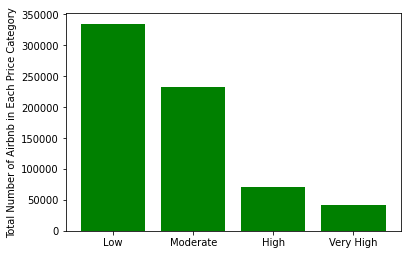

In [0]:
grouped = df.groupby("price category")

a = grouped.get_group('Low').size
b = grouped.get_group('Moderate').size
c = grouped.get_group('High').size
d = grouped.get_group('Very High').size

ydata =[int(a),int(b),int(c),int(d)]
xdata =["Low","Moderate","High", "Very High"]
plt.bar(xdata,ydata, color='green') 
plt.ylabel("Total Number of Airbnb in Each Price Category") 
plt.show()

####Analyzing Price Category in Each Borough

A scatterplot is used to visualize whether a certain price category dominates any Borough. However, the results show that 'Low' price is wide-spread throughout all Boroughs as well as 'Moderate' prices, albeit less; whereas, 'High' and 'Very High' prices are concentrated in a small region of Manhattan. 

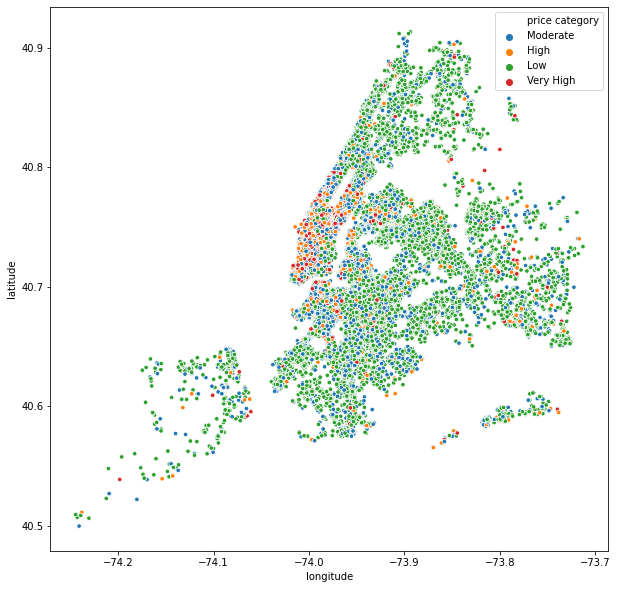

In [0]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='price category',s=20, data=df)

####Density and Distribution Of Prices for each Borough

In [0]:
#Brooklyn
sub_1=df.loc[df['boroname'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=df.loc[df['boroname'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=df.loc[df['boroname'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=df.loc[df['boroname'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=df.loc[df['boroname'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df


,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,149.0,75.0,75.0,65.0
75%,149.0,215.0,110.0,109.0,99.0
max,860.0,860.0,750.0,800.0,800.0


A violin plot is used to display the density and distribution of prices in each Borough. We can set up that the average of all the apartment & room prices are between 50 - 200 dollars.On the other hand, Manhattan and Brooklyn boroughs seem to be overpriced, with the majority of density in prices between 200 - 400 dollars. Furthermore, there is a notice over cost if you'd like to rent a room/apartment in the Manhattan neighbourhood group between 100 - 600 dollars.

Text(0.5, 1.0, 'Density and distribution of prices for each borough')

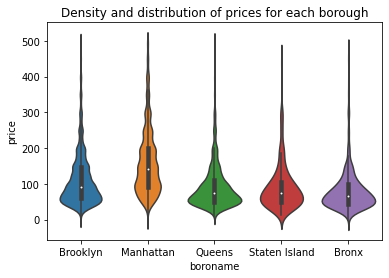

In [0]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization
#creating a sub-dataframe with no extreme values / less than 500
sub_6=df[df.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='boroname', y='price')
viz_2.set_title('Density and distribution of prices for each borough')

####Distribution Price by Boroughs


In [0]:
a = df[df["boroname"] == 'Brooklyn']
b = df[df["boroname"] == 'Queens']
c = df[df["boroname"] == 'Manhattan']
d = df[df["boroname"] == 'Staten Island']
e = df[df["boroname"] == 'Bronx']

a = a["price_log"]
b = b["price_log"]
c = c["price_log"]
d = d["price_log"]
e = e["price_log"]

Text(0.5, 0.98, 'Price Distribution For Brooklyn')

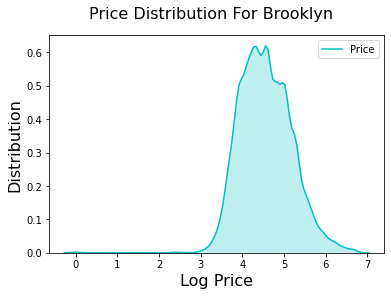

In [0]:

fig = sns.kdeplot(a, shade=True, label="Price", color="c")
plt.xlabel('Log Price', fontsize=16)
plt.ylabel('Distribution', fontsize=16)
fig.figure.suptitle('Price Distribution For Brooklyn', fontsize = 16)

Text(0.5, 0.98, 'Price Distribution For Queens')

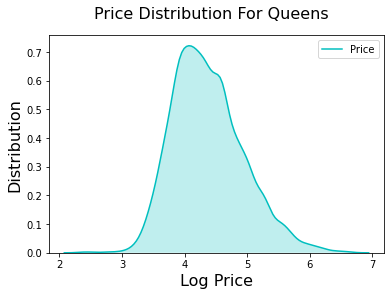

In [0]:
fig = sns.kdeplot(b, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Log Price', fontsize=16)
fig.figure.suptitle('Price Distribution For Queens', fontsize = 16)

Text(0.5, 0.98, 'Price Distribution For Manhattan')

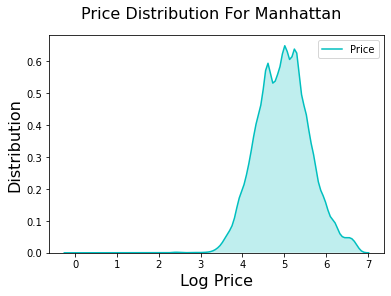

In [0]:
fig = sns.kdeplot(c, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Log Price', fontsize=16)
fig.figure.suptitle('Price Distribution For Manhattan', fontsize = 16)

Text(0.5, 0.98, 'Price Distribution For Staten Islands')

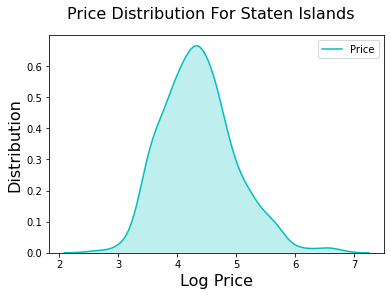

In [0]:
fig = sns.kdeplot(d, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Log Price', fontsize=16)
fig.figure.suptitle('Price Distribution For Staten Islands', fontsize = 16)

Text(0.5, 0.98, 'Price Distribution For Bronx')

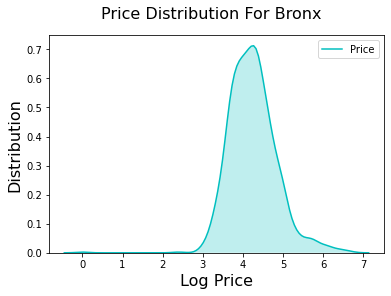

In [0]:
fig = sns.kdeplot(e, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Log Price', fontsize=16)
fig.figure.suptitle('Price Distribution For Bronx', fontsize = 16)

##Minimum Nights To Book Airbnb 

####Displaying Distribution for Minimum Nights

In [0]:
df["minimum_nights"].min()

1

In [0]:
df["minimum_nights"].max()

1250

The distribution is highly skewed towards the left. 

Text(0.5, 0.98, 'Minimum nights Distribution')

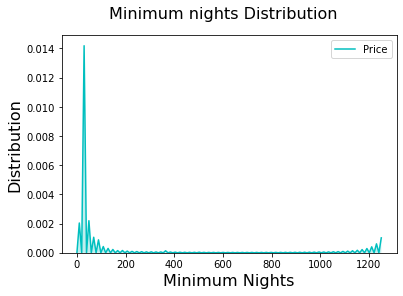

In [0]:
x = df["minimum_nights"]

fig = sns.kdeplot(x, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Minimum Nights', fontsize=16)
fig.figure.suptitle('Minimum nights Distribution', fontsize = 16)

####Removing Outliers

The minimum nights distribution depicts some values exist at the far left end. This means that the data consists of outliers which must be removed. Any Airbnb with minimum night greater than three standard deviations is removed. 

In [0]:
factor = 3
upper_lim = df['minimum_nights'].mean () + df['minimum_nights'].std () * factor
lower_lim = df['minimum_nights'].mean () - df['minimum_nights'].std () * factor

df = df[(df['minimum_nights'] < upper_lim) & (df['minimum_nights'] > lower_lim)]

####Correlation Between Minimum Nights and Price of Airbnb


The scatter plot and line of regression depict that no strong correlation exists between price and number of minimum nights, since some points are further away while some are clustered towards the far left end.

Text(0.5, 0.98, 'Correlation Between Price and Minimum Nights')

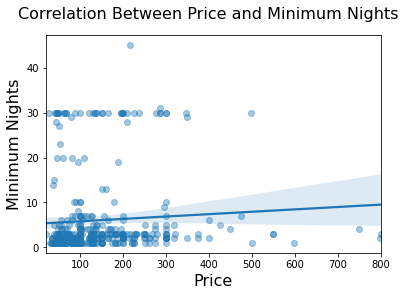

In [0]:
temp = df[["price","minimum_nights"]].sample(n=400)
fig = sns.regplot(x=temp["price"], y=temp["minimum_nights"], scatter_kws={'alpha': 0.4})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Minimum Nights', fontsize=16)
fig.figure.suptitle('Correlation Between Price and Minimum Nights', fontsize = 16)


##Number of Reviews

####Displaying Number of Reviews Distribution

The distribution is skewed towards the left. It seems that most Airbnbs have number of reviews between 1 and 50.

Text(0.5, 0.98, 'Number of Reviews Distribution')

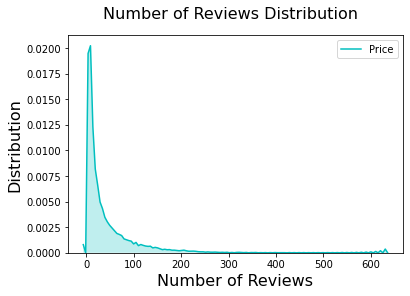

In [0]:
x = df["number_of_reviews"]
fig = sns.kdeplot(x, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=16)
fig.figure.suptitle('Number of Reviews Distribution', fontsize = 16)

####Removing Outliers

The distribution for number of reviews depicts some values exist at the far right end. This means that the data consists of outliers which must be removed. Any Airbnb with number of reviews greater than three standard deviations is removed. 

In [0]:
factor = 3
upper_lim = df['number_of_reviews'].mean () + df['number_of_reviews'].std () * factor
lower_lim = df['number_of_reviews'].mean () - df['number_of_reviews'].std () * factor

df = df[(df['number_of_reviews'] < upper_lim) & (df['number_of_reviews'] > lower_lim)]

####Correlation Between Number of Reviews and Price of Airbnb

The scatter plot and line of regression depict that no strong correlation exists between price and number of reviews, since some points are further away while some are clustered towards the far left end.

Text(0.5, 0.98, 'Correlation Between Price and Number of Reviews')

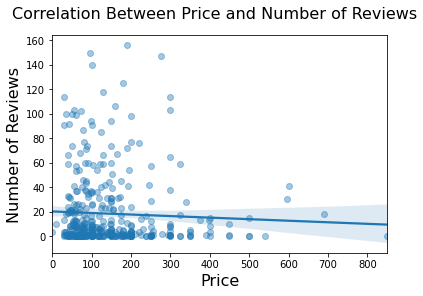

In [0]:
temp = df[["price","number_of_reviews"]].sample(n=400)
fig = sns.regplot(x=temp["price"], y=temp["number_of_reviews"], scatter_kws={'alpha': 0.4})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=16)
fig.figure.suptitle('Correlation Between Price and Number of Reviews', fontsize = 16)

##Availability of Airbnbs


###Displaying availability distribution

Text(0.5, 0.98, 'Availability Distribution')

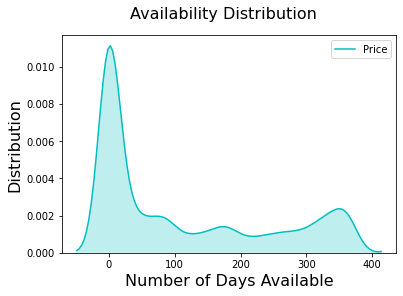

In [0]:
x = df["availability_365"]

fig = sns.kdeplot(x, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Number of Days Available', fontsize=16)
fig.figure.suptitle('Availability Distribution', fontsize = 16)

###Correlation Between Availability and Price of Airbnbs

The scatter plot and line of regression depict that no strong correlation exists between price and availability, since some points are further away from the line of regression.

Text(0.5, 0.98, 'Correlation Between Availability and Price of Airbnb')

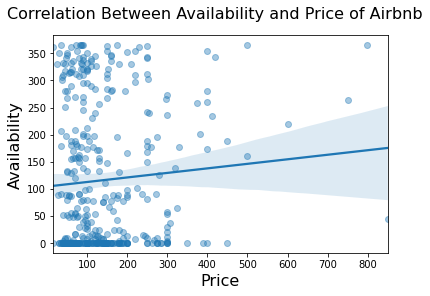

In [0]:
temp = df[["price","availability_365"]].sample(n=400)
fig = sns.regplot(x=temp["price"], y=temp["availability_365"], scatter_kws={'alpha': 0.4})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Availability', fontsize=16)
fig.figure.suptitle('Correlation Between Availability and Price of Airbnb', fontsize = 16)

##Location of Nearest Airport

An external data set is used which provides the list of airports with their latitude and longitude and other info. The latitude and longitude where the only information extracted from that data to check if the closiness of an Airbnb to an airport is correlated with the price of the Airbnb.
[link text](https://https://drive.google.com/open?id=1qAQ_XgFLs6UVrXUzSM7tVoypsMQHPanX)

####Finding Distance to Nearest Airport

In [0]:
data_path = "/content/gdrive/My Drive"
filename = "us-airports.csv"

airp = pd.read_csv(join(data_path, filename), delimiter=",")
airp.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +code +iso2,#adm1 +code +iso,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,3632,KLAX,large_airport,Los Angeles International Airport,33.94250107,-118.4079971,125,NaN,US,US-CA,Los Angeles,1,KLAX,LAX,LAX,http://www.iflylax.com/,https://en.wikipedia.org/wiki/Los_Angeles_Inte...,NaN,1335475,2010-01-23T11:27:55+00:00
2,3754,KORD,large_airport,Chicago O'Hare International Airport,41.9786,-87.9048,672,NaN,US,US-IL,Chicago,1,KORD,ORD,ORD,https://www.flychicago.com/ohare/home/pages/de...,https://en.wikipedia.org/wiki/O'Hare_Internati...,"CHI, Orchard Place",1503175,2018-09-16T02:35:35+00:00
3,3622,KJFK,large_airport,John F Kennedy International Airport,40.63980103,-73.77890015,13,NaN,US,US-NY,New York,1,KJFK,JFK,JFK,http://www.panynj.gov/CommutingTravel/airports...,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild",1052075,2010-01-23T11:27:54+00:00
4,3384,KATL,large_airport,Hartsfield Jackson Atlanta International Airport,33.6367,-84.428101,1026,NaN,US,US-GA,Atlanta,1,KATL,ATL,ATL,http://www.atlanta-airport.com/,https://en.wikipedia.org/wiki/Hartsfield–Jacks...,NaN,2002475,2018-09-19T14:50:01+00:00


In [0]:
airp = airp.loc[airp['municipality'] == 'New York']
airp = airp.loc[airp['type'] == 'large_airport']
airp.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
3,3622,KJFK,large_airport,John F Kennedy International Airport,40.63980103,-73.77890015,13,NaN,US,US-NY,New York,1,KJFK,JFK,JFK,http://www.panynj.gov/CommutingTravel/airports...,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild",1052075,2010-01-23T11:27:54+00:00
10,3643,KLGA,large_airport,La Guardia Airport,40.77719879,-73.87259674,21,NaN,US,US-NY,New York,1,KLGA,LGA,LGA,http://www.panynj.gov/CommutingTravel/airports...,https://en.wikipedia.org/wiki/LaGuardia_Airport,"Manhattan, New York City, NYC, Glenn H. Curtis...",1030575,2010-01-23T11:27:55+00:00


In [0]:
lst = [ ]

def findingDistance():
  df["distance_from_airport"] = df["minimum_nights"]
  for i in df.index:
    startlat = df.loc[i, ("latitude")]
    startlong = df.loc[i,("longitude")]
    for x in airp.index:
      endlat =airp.loc[x,("latitude_deg")]
      endlong =airp.loc[x,("longitude_deg")]
      dist =  geodesic((startlat, startlong), (endlat, endlong)).km
      lst.append(dist)

    lowest = min(lst)
    lst.clear()
    df.loc[i, ("distance_from_airport")] = lowest

findingDistance()
df.head()

,id,host_id,boroname,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_log,price category,distance_from_airport
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,5.010635,Moderate,16.387230
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.420535,High,9.745029
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,5.017280,Moderate,6.833635
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.394449,Low,6.473973
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,5.303305,Moderate,9.247493


####Displaying Distribution For Distance to Nearest Airport

In [0]:
df["distance_from_airport"].min()

0.6684233341635544

In [0]:
df["distance_from_airport"].max()

42.093487148736145

The distribution shows that the nearest distance to the airport is slightly skewed to the left. 

Text(0.5, 0.98, 'Distribution for Nearest Airport')

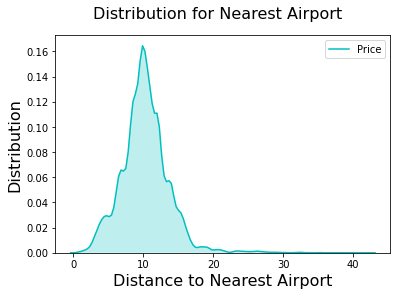

In [0]:
x = df["distance_from_airport"]
fig = sns.kdeplot(x, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Distance to Nearest Airport', fontsize=16)
fig.figure.suptitle('Distribution for Nearest Airport', fontsize = 16)

####Removing Outliers

The distribution for distance to nearest airport depicts some values exist at the far right end. This means that the data consists of outliers which must be removed. Any Airbnb with distance to airport greater than three standard deviations is removed. 

In [0]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim = df['distance_from_airport'].mean () + df['distance_from_airport'].std () * factor
lower_lim = df['distance_from_airport'].mean () - df['distance_from_airport'].std () * factor

df = df[(df['distance_from_airport'] < upper_lim) & (df['distance_from_airport'] > lower_lim)]

####Correlation Between Distance to Nearest Aiport and Airbnb Price

The scatter plot and line of regression depict that no strong correlation exists between price and distance to nearest airport, since some points are further away from the line of regression and many poins are clustered towards the left.

Text(0.5, 0.98, 'Correlation Between Price and Distance to Nearest Airport')

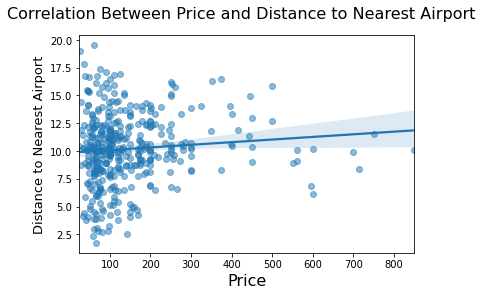

In [0]:
pr_air = df[["price", "distance_from_airport"]].sample(400)
pri=pr_air["distance_from_airport"]
air=pr_air["price"]
fig = sns.regplot(air,pri, scatter_kws={'alpha':0.5})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Distance to Nearest Airport', fontsize=13)
fig.figure.suptitle('Correlation Between Price and Distance to Nearest Airport', fontsize = 16)

##Locations of Nearby Parks and Events

An external data set is used which provides a list of parks and events in 2019 with their latitude and longitude and other info. The latitude and longitude where the only information extracted from that data to check if any of the parks or events are near an Airbnb. We want to check if there's any correlation price and distance to nearest park or event.
[link text](https://https://drive.google.com/open?id=11IQ1sB4Aq-0azCn4Xvc0eVEqgKHWd3fK)

####Finding Distance to Nearest Park or Event

In [0]:
data_path = "/content/gdrive/My Drive"
filename = "ParksEvents.csv"

pf = pd.read_csv(join(data_path, filename), delimiter=",")

In [0]:
pf.head()

,event_id,name,park_id,lat,long,address,zip,borough,accessible
0,114666,Pier 2,B431,40.699449,-73.998758,NaN,NaN,B,1.0
1,167556,Pier 6,B431,40.692600,-74.001900,NaN,11201.0,B,NaN
2,152703,Kids Playground,M098,40.730795,-73.996736,NaN,NaN,M,NaN
3,90182,The Green,M008,40.753906,-73.984642,NaN,NaN,M,1.0
4,76384,First Park,M124,40.723499,-73.989799,NaN,10002.0,M,NaN


In [0]:
pf.shape

(95796, 9)

In [0]:
def coor(row):
  return np.array([row["latitude"],row["longitude"]])
df["cart"] = df.apply(coor,axis=1)

In [0]:
import scipy
combined_x_y_arrays = np.dstack([pf["lat"].ravel(),pf["long"].ravel()])[0]
mytree = scipy.spatial.cKDTree(combined_x_y_arrays)

def do_kdtree(row):
    point = row["cart"]
    dist, indexes = mytree.query(point)
    end = combined_x_y_arrays[indexes]
    return geodesic(point, end).meters
df["distance to nearest park or event"] = df.apply(do_kdtree,axis=1)
df.head()

,id,host_id,boroname,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_log,price category,distance_from_airport,cart,distance to nearest park or event
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,5.010635,Moderate,16.387230,"[40.647490000000005, -73.97237]",394.584015
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.420535,High,9.745029,"[40.75362, -73.98376999999999]",14.263708
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,5.017280,Moderate,6.833635,"[40.809020000000004, -73.9419]",88.880392
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.394449,Low,6.473973,"[40.79851, -73.94399]",127.865889
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,5.303305,Moderate,9.247493,"[40.74767, -73.975]",257.221457


####Displaying Distribution For Distance to Nearest Park or Event

In [0]:
df["distance to nearest park or event"].min()

1.2681093724465347

In [0]:
df["distance to nearest park or event"].max()

1877.3005750734117

Distribution for smallest distance to the nearest park/event is skewed to the left. 

Text(0.5, 0.98, 'Distribution for Distance to Nearest Park/Event')

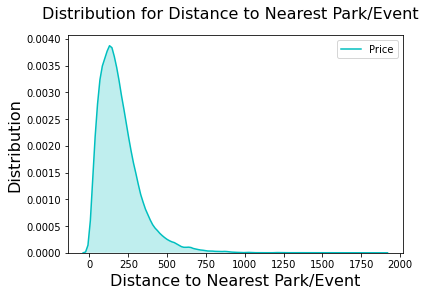

In [0]:
x = df["distance to nearest park or event"]
fig = sns.kdeplot(x, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Distance to Nearest Park/Event', fontsize=16)
fig.figure.suptitle('Distribution for Distance to Nearest Park/Event', fontsize = 16)

The above distribution graph shows that there is a left-skewed distribution on smallest distance to park/event. This means there is a positive skewness. It also means that most airbnbs are at most 600m away from a park or event. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis



Text(0.5, 1.0, 'Log-Dist_to_Park_Event Distribution Plot')

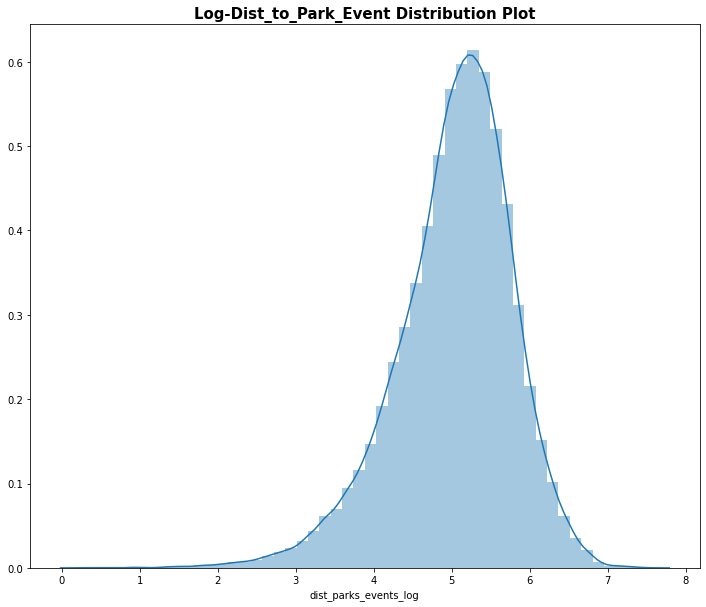

In [0]:
df['dist_parks_events_log'] = np.log(df["distance to nearest park or event"])
plt.figure(figsize=(12,10))
sns.distplot(df['dist_parks_events_log'])
plt.title("Log-Dist_to_Park_Event Distribution Plot",size=15, weight='bold')

####Removing Outliers

The distribution for distance to nearest park or event depicts some values exist at the far right end. This means that the data consists of outliers which must be removed. Any Airbnb with distance to nearest park or event greater than three standard deviations is removed. 

In [0]:
factor = 3
upper_lim = df['distance to nearest park or event'].mean () + df['distance to nearest park or event'].std () * factor
lower_lim = df['distance to nearest park or event'].mean () - df['distance to nearest park or event'].std () * factor

df = df[(df['distance to nearest park or event'] < upper_lim) & (df['distance to nearest park or event'] > lower_lim)]

####Correlation Between Distance to Nearest Park or Event and Airbnb Price

The scatter plot and line of regression depict that no strong correlation exists between price and distance to nearest park or event, since some points are further away from the line of regression and many poins are clustered towards the left.

Text(0.5, 0.98, 'Correlation Between Price and Distance to Nearest Park or Event')

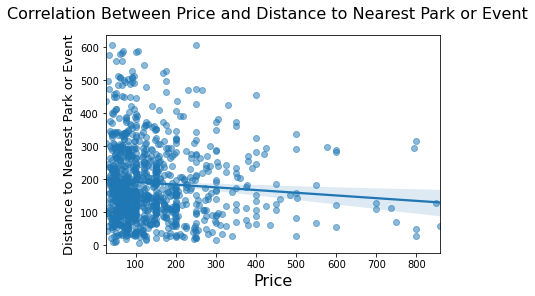

In [0]:
pr_pe = df[["price", "distance to nearest park or event"]].sample(1000)
pri=pr_pe["distance to nearest park or event"]
pe=pr_pe["price"]
fig = sns.regplot(pe,pri, scatter_kws={'alpha':0.5})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Distance to Nearest Park or Event', fontsize=13)
fig.figure.suptitle('Correlation Between Price and Distance to Nearest Park or Event', fontsize = 16)

##Locations of Nearby Subway Stations

An external data set is used which provides a list of subway stations with their latitude and longitude and other info. The latitude and longitude where the only information extracted from that data to check if the closiness of an Airbnb to a subway station is correlated with the price of the Airbnb.
[link text](https://https://drive.google.com/open?id=1RRmXEl-vKcgUFcJSHfxy4GHvYpr56kWk)

####Finding Distance to Nearest Subway station

In [0]:
data_path = "/content/gdrive/My Drive"
filename = "NYC_Transit_Subway_Entrance_And_Exit_Data.csv"

sdf = pd.read_csv(join(data_path, filename), delimiter=",")

In [0]:
sdf.shape

(1868, 32)

In [0]:
sdf.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,Route6,Route7,Route8,Route9,Route10,Route11,Entrance Type,Entry,Exit Only,Vending,Staffing,Staff Hours,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,NONE,NaN,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stair,YES,NaN,YES,FULL,NaN,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [0]:
import scipy
from geopy.distance import geodesic

combined_x_y_arrays = np.dstack([sdf["Station Latitude"].ravel(),sdf["Station Longitude"].ravel()])[0]
mytree = scipy.spatial.cKDTree(combined_x_y_arrays)

def do_kdtree(row):
    point = row["cart"]
    dist, indexes = mytree.query(point)
    end = combined_x_y_arrays[indexes]
    return geodesic(point, end).meters
df["distance to nearest subwaystation"] = df.apply(do_kdtree,axis=1)
df.head()

,id,host_id,boroname,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_log,price category,distance_from_airport,cart,distance to nearest park or event,dist_parks_events_log,distance to nearest subwaystation
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,5.010635,Moderate,16.387230,"[40.647490000000005, -73.97237]",394.584015,5.977832,465.433844
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.420535,High,9.745029,"[40.75362, -73.98376999999999]",14.263708,2.657718,94.983136
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,5.017280,Moderate,6.833635,"[40.809020000000004, -73.9419]",88.880392,4.487292,334.336244
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.394449,Low,6.473973,"[40.79851, -73.94399]",127.865889,4.850982,200.694925
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,5.303305,Moderate,9.247493,"[40.74767, -73.975]",257.221457,5.549937,426.808249


####Displaying Distribution For Distance to Nearest Subway Station

In [0]:
df["distance to nearest subwaystation"].min()

0.907523521738452

In [0]:
df["distance to nearest subwaystation"].max()

8061.343332932097

Text(0.5, 0.98, 'Distribution for Nearest Subway Entrance')

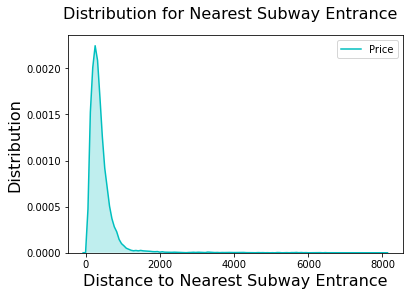

In [0]:
x = df["distance to nearest subwaystation"]
fig = sns.kdeplot(x, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Distance to Nearest Subway Entrance', fontsize=16)
fig.figure.suptitle('Distribution for Nearest Subway Entrance', fontsize = 16)

The above distribution graph shows that there is a left-skewed distribution on smallest distance to park/event. This means there is a positive skewness. It also means that most airbnbs are located atleast 1000m near a subway station. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis



Text(0.5, 1.0, 'Log-Dist_to_SubwayStation Distribution Plot')

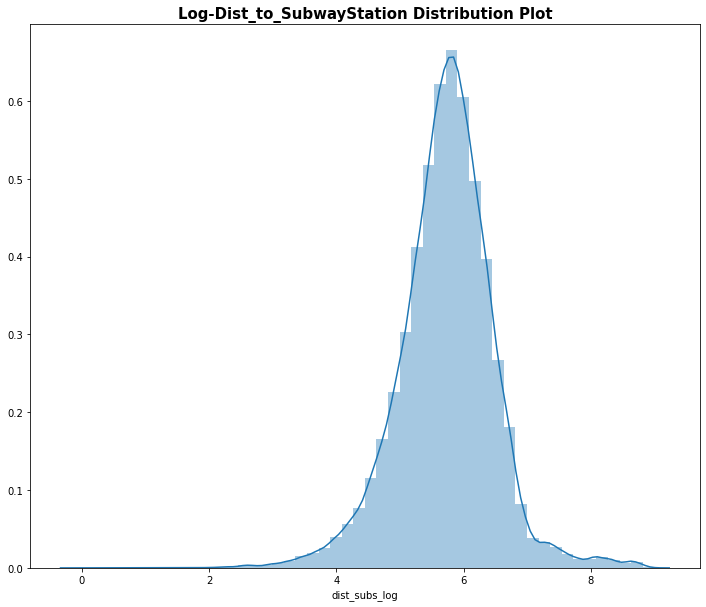

In [0]:
df['dist_subs_log'] = np.log(df["distance to nearest subwaystation"])
plt.figure(figsize=(12,10))
sns.distplot(df['dist_subs_log'])
plt.title("Log-Dist_to_SubwayStation Distribution Plot",size=15, weight='bold')

####Removing Outliers

The distribution for distance to nearest subway station depicts some values exist at the far right end. This means that the data consists of outliers which must be removed. Any Airbnb with distance to subway station greater than three standard deviations is removed. 

In [0]:
factor = 3
upper_lim = df['distance to nearest subwaystation'].mean () + df['distance to nearest subwaystation'].std () * factor
lower_lim = df['distance to nearest subwaystation'].mean () - df['distance to nearest subwaystation'].std () * factor

df = df[(df['distance to nearest subwaystation'] < upper_lim) & (df['distance to nearest subwaystation'] > lower_lim)]

####Correlation Between Distance To Nearest Subway Station  and Airbnb Price

The scatter plot and line of regression depict that no strong correlation exists between price and distance to nearest subway station, since some points are further away from the line of regression and many poins are clustered towards the left.

Text(0.5, 0.98, 'Correlation Between Price and Distance to Nearest Park or Event')

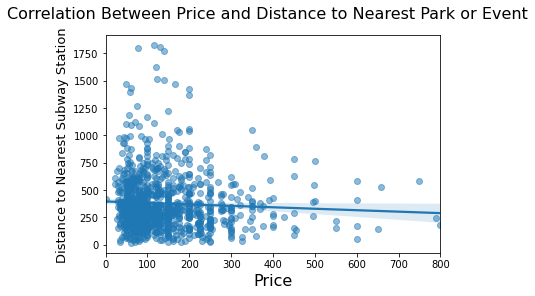

In [0]:
pr_sub = df[["price", "distance to nearest subwaystation"]].sample(1000)
pri=pr_sub["distance to nearest subwaystation"]
subs=pr_sub["price"]
fig = sns.regplot(subs,pri, scatter_kws={'alpha':0.5})
plt.xlabel('Price', fontsize=16)
plt.ylabel('Distance to Nearest Subway Station', fontsize=13)
fig.figure.suptitle('Correlation Between Price and Distance to Nearest Park or Event', fontsize = 16)

##Number of Nearby Historical Sites

An external data set is used and it provides a list of historical sites with their latitude and longitude and other info given. The latitude and longitude where the only information extracted from that data to check if the number of historical sites around the Airbnb is correlated with its price.

####Finding Number of Historical Sites Within 30km Radius

In [0]:
data_path = "/content/gdrive/My Drive"
filename = "State_Historic_Sites.csv"

hdf = pd.read_csv(join(data_path, filename), delimiter=",")

In [0]:
hdf.head()

,Name,Category,Region,County,Facility URL,Longitude,Latitude,Location
0,Bennington Battlefield,State Historic Site,11,Rensselaer,https://parks.ny.gov/historic-sites/12/details...,-73.302251,42.939506,"(42.93950615, -73.3022506)"
1,Crown Point,State Historic Site,11,Essex,https://parks.ny.gov/historic-sites/34/details...,-73.431663,44.023325,"(44.02332481, -73.43166319)"
2,Grant Cottage,State Historic Site,11,Saratoga,https://parks.ny.gov/historic-sites/9/details....,-73.745418,43.201212,"(43.2012117, -73.74541757)"
3,Old Fort Niagara,State Historic Site,1,Niagara,https://parks.ny.gov/historic-sites/31/details...,-79.063114,43.262594,"(43.26259391, -79.06311435)"
4,Susan B Anthony,State Historic Site,11,Washington,NaN,-73.423120,43.110530,"(43.11052997, -73.42311978)"


In [0]:
hdf.shape

(41, 8)

In [0]:
from geopy.distance import geodesic
latP = hdf["Latitude"]
lonP = hdf["Longitude"]
def dist(row):
  x1=row["latitude"]
  y1=row["longitude"]
  num= 0;
  for x in range(latP.count()):
    x2=latP[x]
    y2=lonP[x]
    start = (x1,y1)
    end = (x2,y2)
    dis = geodesic(start, end).meters
    if dis <= 30000:
      num+=1
  return num
df["number of historical sites within 30km"] = df.apply(dist,axis=1)
df.head()

,id,host_id,boroname,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_log,price category,distance_from_airport,cart,distance to nearest park or event,dist_parks_events_log,distance to nearest subwaystation,dist_subs_log,number of historical sites within 30km
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,5.010635,Moderate,16.387230,"[40.647490000000005, -73.97237]",394.584015,5.977832,465.433844,6.142970,0
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,5.420535,High,9.745029,"[40.75362, -73.98376999999999]",14.263708,2.657718,94.983136,4.553699,1
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,5.017280,Moderate,6.833635,"[40.809020000000004, -73.9419]",88.880392,4.487292,334.336244,5.812147,1
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,4.394449,Low,6.473973,"[40.79851, -73.94399]",127.865889,4.850982,200.694925,5.301786,1
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,5.303305,Moderate,9.247493,"[40.74767, -73.975]",257.221457,5.549937,426.808249,6.056335,1


####Displaying Distribution for Number of Historical Sites Within 30km Radius

In [0]:
df["number of historical sites within 30km"].min()

0

In [0]:
df["number of historical sites within 30km"].max()

3

Text(0.5, 0.98, 'Distribution for Number of Near Historical Sites')

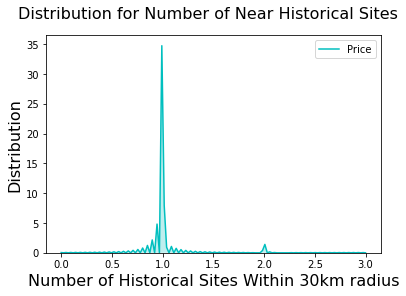

In [0]:
x = df["number of historical sites within 30km"]
fig = sns.kdeplot(x, shade=True, label="Price", color="c")
plt.ylabel('Distribution', fontsize=16)
plt.xlabel('Number of Historical Sites Within 30km radius', fontsize=16)
fig.figure.suptitle('Distribution for Number of Near Historical Sites', fontsize = 16)

This shows that most airbnbs have one historical site within a 30 km radius.

##Airbnb Room Type

####Converting Room Type to Numerical Data

In [0]:
def type_categorize(p):
  if p == 'Private room':
    return 1

  elif p == 'Entire home/apt':
    return 2

  else:
    return 3

df["room_type_numerical"] = df["room_type"].apply(type_categorize)

##Correlation of Price With Other Features

The correlation table shows us that there is no strong relationship between price and other features.
However price_log shows some correleations with room_types.

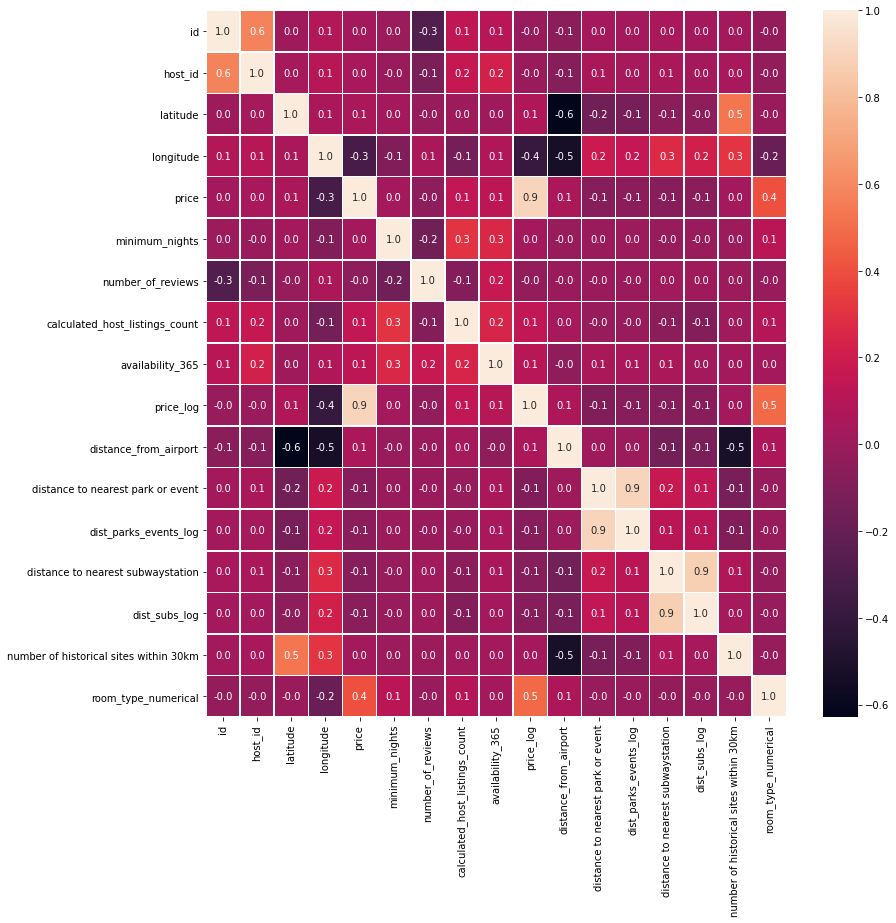

In [0]:
f,ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df.drop('neighbourhood', axis = 1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

The correlation matrix helps to identify the variables that are/are not correlated. Following are the correlation coefficients for price with other features:

1.  room type -> 0.4
2.  number of historical sites -> 0.0
3.  distance to nearest subway station -> -0.1
4.  distance to airport -> 0.1
5.  availability -> 0.1
6.  number of reviews -> 0.1
7.  minimum nights -> 0.0 


None of the correlation coefficients are closer to 1 or -1, which suggests that there does not exist any strong linear relationship between price and other variables, proving our initial assumptions wrong. 

#Part 2: Hypothesis Testing 

##T - test

T - test is being used to find out if there is any significant difference between the mean prices of Airbnb in Manhattan and Brooklyn. 

$H_0: \mu_{1} = \mu_{2}$

$H_A: \mu_{1} \neq \mu_{2}$

In [0]:
grouped = df.groupby("boroname")

m = grouped.get_group('Manhattan')
b = grouped.get_group('Brooklyn')

manhattan = m["price_log"]
brooklyn = b["price_log"]

####Visualizing Price Distribution

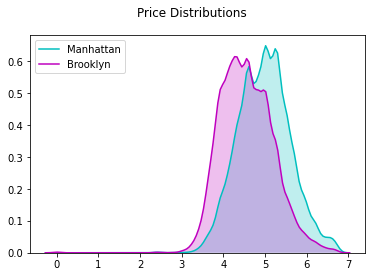

In [0]:
sns.kdeplot(m["price_log"], shade=True, label="Manhattan", color="c")
sns.kdeplot(b["price_log"], shade=True, label="Brooklyn", color="m")

plt.suptitle("Price Distributions")
plt.show()

####Conducting T - Test

In [0]:
tcrit, pval = stats.ttest_ind(manhattan, brooklyn, equal_var=False)
print('tcrit = ' , tcrit)
print('pval = ', pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print("we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

tcrit =  66.74011631927613
pval =  0.0
we are rejecting null hypothesis


If we set the significance level as 0.05, we can reject the null hypothesis. In addition, the test score is positive which indicates that the mean price of Airbnb is higher in Manhattan than Brooklyn.

#Findings 

All of the features show little to no correlation with price, proving our initial assumptions wrong. However, we found that the neighbourhood group may affect the price of an Airbnb, as the average prices for Manhattan are much higher than the others. 

#Next steps

Part 1 and part 2 were completed in this part of the project, but as for part 3, applying Machine Learning model to find Airbnb Recommendations, will be completed in the next step. The machine learning technique that will be used is KNN. In addition, a more thorough report will be written.